In [ ]:
FOR DATASET-I

In [1]:
import os
import librosa
import numpy as np
from pydub import AudioSegment
from pydub.silence import split_on_silence

# Define paths
input_base_path = r'F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\ReadText\multiclass'
output_base_path = r'F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\ReadText\converted multiclass'
folders = ['Normal', 'PD Severity 2','PD Severity 3','PD Severity 4']

# Helper function to perform noise reduction
def noise_reduction(y, sr, reduction_factor=1.0):
    # Take the first second as a noise sample
    noise_sample = y[:sr]  
    # Calculate a noise threshold based on the average amplitude in the noise sample
    noise_profile = np.mean(np.abs(noise_sample)) * reduction_factor
    # Set values below the noise threshold to zero
    return np.where(np.abs(y) > noise_profile, y, 0)

# Function to process and clean each file
def process_audio(file_path, output_path, silence_thresh=-30, min_silence_len=700):
    try:
        # Load the audio file
        y, sr = librosa.load(file_path, sr=None)

        # Apply noise reduction
        y_cleaned = noise_reduction(y, sr, reduction_factor=1.0)

        # Convert to Pydub AudioSegment to enable silence splitting
        audio_segment = AudioSegment(
            y_cleaned.tobytes(), 
            frame_rate=sr, 
            sample_width=y_cleaned.dtype.itemsize, 
            channels=1
        )

        # Split on silence with more aggressive parameters
        chunks = split_on_silence(
            audio_segment,
            min_silence_len=min_silence_len,  # Minimum silence length to split
            silence_thresh=silence_thresh  # Silence threshold in dB
        )

        # Concatenate chunks to remove silences
        cleaned_audio = AudioSegment.empty()
        for chunk in chunks:
            cleaned_audio += chunk

        # Export cleaned audio
        cleaned_audio.export(output_path, format="wav")
        print(f"Processed {file_path} and saved to {output_path}")

    except Exception as e:
        print(f"Error processing {file_path}: {e}")

# Main processing loop
for folder in folders:
    input_folder = os.path.join(input_base_path, folder)
    output_folder = os.path.join(output_base_path, f"{folder}_Cleaned")
    os.makedirs(output_folder, exist_ok=True)

    for filename in os.listdir(input_folder):
        if filename.endswith(".wav"):
            input_file = os.path.join(input_folder, filename)
            output_file = os.path.join(output_folder, filename)
            process_audio(input_file, output_file)


C:\ProgramData\Anaconda3\envs\Tremor_tf\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


Processed F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\ReadText\multiclass\Normal\ID00_hc_0_0_0.wav and saved to F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\ReadText\converted multiclass\Normal_Cleaned\ID00_hc_0_0_0.wav
Processed F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\ReadText\multiclass\Normal\ID01_hc_0_0_0.wav and saved to F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\ReadText\converted multiclass\Normal_Cleaned\ID01_hc_0_0_0.wav
Processed F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\ReadText\multiclass\Normal\ID03_hc_0_0_0.wav and saved to F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\ReadText\converted multiclass\Normal_Cleaned\ID03_hc_0_0_0.wav
Processed F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\ReadText\multiclass\Normal\ID05_hc_0_0_0.wav and saved to F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\ReadText\converted multiclass\Normal_Cleaned\ID05_hc_0_0_0.wav
Processed F:\PhD 2021-2024\Phd-IV Ye

In [17]:
import os
import librosa
import numpy as np
import pandas as pd
from pydub import AudioSegment
from pydub.silence import split_on_silence

# Define paths
input_base_path = r'F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\ReadText'
output_base_path = r'F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\Cleaned_ReadText'
folders = ['HC', 'PD']

# Initialize an empty list to store data for the table
duration_data = []

# Helper function to perform noise reduction
def noise_reduction(y, sr, reduction_factor=1.2):  # Increased reduction factor
    # Take the first second as a noise sample
    noise_sample = y[:sr]  
    # Calculate a noise threshold based on the average amplitude in the noise sample
    noise_profile = np.mean(np.abs(noise_sample)) * reduction_factor
    # Set values below the noise threshold to zero
    return np.where(np.abs(y) > noise_profile, y, 0)

# Function to process and clean each file
def process_audio(file_path, output_path, silence_thresh=-25, min_silence_len=1000):  # Adjusted parameters
    try:
        # Load the original audio file and calculate its duration
        y, sr = librosa.load(file_path, sr=None)
        original_duration = len(y) / sr

        # Apply noise reduction and calculate duration after noise reduction
        y_cleaned = noise_reduction(y, sr, reduction_factor=1.2)
        noise_reduced_duration = len(y_cleaned[y_cleaned != 0]) / sr  # Count only non-zero samples

        # Convert to Pydub AudioSegment to enable silence splitting
        audio_segment = AudioSegment(
            y_cleaned.tobytes(), 
            frame_rate=sr, 
            sample_width=y_cleaned.dtype.itemsize, 
            channels=1
        )

        # Split on silence with more aggressive parameters
        chunks = split_on_silence(
            audio_segment,
            min_silence_len=min_silence_len,  # Minimum silence length to split
            silence_thresh=silence_thresh  # Silence threshold in dB
        )

        # Concatenate chunks to remove silences
        cleaned_audio = AudioSegment.empty()
        for chunk in chunks:
            cleaned_audio += chunk

        # Calculate final duration after silence removal
        final_duration = len(cleaned_audio) / 1000  # Convert from ms to seconds

        # Export cleaned audio
        cleaned_audio.export(output_path, format="wav")
        print(f"Processed {file_path} and saved to {output_path}")

        # Append data for this file to the table
        duration_data.append({
            "Filename": os.path.basename(file_path),
            "Original Duration (s)": original_duration,
            "After Noise Reduction (s)": noise_reduced_duration,
            "After Silence Removal (s)": final_duration
        })

    except Exception as e:
        print(f"Error processing {file_path}: {e}")

# Main processing loop
for folder in folders:
    input_folder = os.path.join(input_base_path, folder)
    output_folder = os.path.join(output_base_path, f"{folder}_Cleaned")
    os.makedirs(output_folder, exist_ok=True)

    for filename in os.listdir(input_folder):
        if filename.endswith(".wav"):
            input_file = os.path.join(input_folder, filename)
            output_file = os.path.join(output_folder, filename)
            process_audio(input_file, output_file)

# Convert duration data to a DataFrame and display the table
duration_df = pd.DataFrame(duration_data)
print(duration_df)


Processed F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\ReadText\HC\ID00_hc_0_0_0.wav and saved to F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\Cleaned_ReadText\HC_Cleaned\ID00_hc_0_0_0.wav
Processed F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\ReadText\HC\ID01_hc_0_0_0.wav and saved to F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\Cleaned_ReadText\HC_Cleaned\ID01_hc_0_0_0.wav
Processed F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\ReadText\HC\ID03_hc_0_0_0.wav and saved to F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\Cleaned_ReadText\HC_Cleaned\ID03_hc_0_0_0.wav
Processed F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\ReadText\HC\ID05_hc_0_0_0.wav and saved to F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\Cleaned_ReadText\HC_Cleaned\ID05_hc_0_0_0.wav
Processed F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\ReadText\HC\ID08_hc_0_0_0.wav and saved to F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\C

In [8]:
import os
import librosa
import numpy as np
import pandas as pd
from pydub import AudioSegment
from pydub.silence import split_on_silence

# Define paths
input_base_path = r'F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\ReadText'
output_base_path = r'F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\Cleaned_ReadText'
folders = ['HC', 'PD']

# Initialize an empty list to store data for the table
duration_data = []

# Helper function to perform noise reduction
def noise_reduction(y, sr, reduction_factor=1.2):  # Increased reduction factor
    noise_sample = y[:sr]  # Take the first second as a noise sample
    noise_profile = np.mean(np.abs(noise_sample)) * reduction_factor
    return np.where(np.abs(y) > noise_profile, y, 0)

# Function to process and clean each file
def process_audio(file_path, output_path, silence_thresh=-25, min_silence_len=1000):  # Adjusted parameters
    try:
        # Load the original audio file and calculate its duration
        y, sr = librosa.load(file_path, sr=None)
        original_duration = len(y) / sr

        # Apply noise reduction and calculate duration after noise reduction
        y_cleaned = noise_reduction(y, sr, reduction_factor=1.2)
        noise_reduced_duration = len(y_cleaned[y_cleaned != 0]) / sr  # Count only non-zero samples

        # Convert to Pydub AudioSegment to enable silence splitting
        audio_segment = AudioSegment(
            y_cleaned.tobytes(), 
            frame_rate=sr, 
            sample_width=y_cleaned.dtype.itemsize, 
            channels=1
        )

        # Split on silence with more aggressive parameters
        chunks = split_on_silence(
            audio_segment,
            min_silence_len=min_silence_len,  # Minimum silence length to split
            silence_thresh=silence_thresh  # Silence threshold in dB
        )

        # Concatenate chunks to remove silences
        cleaned_audio = AudioSegment.empty()
        for chunk in chunks:
            cleaned_audio += chunk

        # Calculate final duration after silence removal
        final_duration = len(cleaned_audio) / 1000  # Convert from ms to seconds

        # Export cleaned audio
        cleaned_audio.export(output_path, format="wav")
        print(f"Processed {file_path} and saved to {output_path}")

        # Append data for this file to the table
        duration_data.append({
            "Filename": os.path.basename(file_path),
            "Original Duration (s)": original_duration,
            "After Noise Reduction (s)": noise_reduced_duration,
            "After Silence Removal (s)": final_duration
        })

    except Exception as e:
        print(f"Error processing {file_path}: {e}")

# Main processing loop
for folder in folders:
    input_folder = os.path.join(input_base_path, folder)
    output_folder = os.path.join(output_base_path, f"{folder}_Cleaned")
    os.makedirs(output_folder, exist_ok=True)

    for filename in os.listdir(input_folder):
        if filename.endswith(".wav"):
            input_file = os.path.join(input_folder, filename)
            output_file = os.path.join(output_folder, filename)
            process_audio(input_file, output_file)

# Convert duration data to a DataFrame and display the table
duration_df = pd.DataFrame(duration_data)
print("\nFinal Duration Data:")
print(duration_df.to_string(index=False))


Processed F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\ReadText\HC\ID00_hc_0_0_0.wav and saved to F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\Cleaned_ReadText\HC_Cleaned\ID00_hc_0_0_0.wav
Processed F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\ReadText\HC\ID01_hc_0_0_0.wav and saved to F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\Cleaned_ReadText\HC_Cleaned\ID01_hc_0_0_0.wav
Processed F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\ReadText\HC\ID03_hc_0_0_0.wav and saved to F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\Cleaned_ReadText\HC_Cleaned\ID03_hc_0_0_0.wav
Processed F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\ReadText\HC\ID05_hc_0_0_0.wav and saved to F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\Cleaned_ReadText\HC_Cleaned\ID05_hc_0_0_0.wav
Processed F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\ReadText\HC\ID08_hc_0_0_0.wav and saved to F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\C

In [3]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
from scipy.ndimage import median_filter

# Define paths
input_base_path = r'F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\ReadText\converted multiclass'
output_base_path = r'F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\ReadText\converted_multiclassimg'  # Corrected folder name
categories = ['Normal_Cleaned', 'PD Severity 2_Cleaned', 'PD Severity 3_Cleaned', 'PD Severity 4_Cleaned']
types = ['stft']  # Focus only on STFT

# VAD segmentation parameters
vad_window_size = 0.02  # 20 ms window
merge_distance = 0.25  # 250 ms merge threshold
threshold_factor = 0.7  # Adjusted threshold factor

# Minimum segment duration in samples (e.g., 1 second)
min_segment_samples = int(1 * 44100)  # 44.1 kHz sample rate

# Helper function for short-term energy and spectral spread
def compute_energy_spread(y, sr, frame_length=2048, hop_length=512):
    st_energy = np.array([sum(abs(y[i:i+frame_length])**2) for i in range(0, len(y), hop_length)])
    st_energy = median_filter(st_energy, size=5)  # Apply median filter to smooth energy
    
    spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr, hop_length=hop_length)
    spectral_spread = np.sqrt(np.mean((spectral_centroids - np.mean(spectral_centroids))**2))
    spectral_spread = median_filter(spectral_spread, size=5)  # Apply median filter to smooth spread
    
    return st_energy, spectral_spread

# Function to apply VAD and segment audio
def vad_segmentation(y, sr, st_energy, spectral_spread, threshold_factor=0.5):
    speech_segments = []
    
    # Calculate threshold values
    energy_threshold = np.percentile(st_energy, 30) * threshold_factor
    spread_threshold = np.percentile(spectral_spread, 30) * threshold_factor
    print(f"Energy threshold: {energy_threshold}, Spread threshold: {spread_threshold}")
    
    is_speech = (st_energy > energy_threshold) & (spectral_spread > spread_threshold)
    current_segment = []
    
    for i, frame in enumerate(is_speech):
        if frame:
            current_segment.append(i)
        elif current_segment:
            if len(speech_segments) > 0 and (i - speech_segments[-1][-1] <= int(merge_distance * sr / (vad_window_size * sr))):
                speech_segments[-1].extend(current_segment)
            else:
                if len(current_segment) * int(sr * vad_window_size) >= min_segment_samples:
                    speech_segments.append(current_segment)
            current_segment = []
    
    if not speech_segments:
        print("No segments found after applying thresholds.")
    return speech_segments

# Function to save spectrogram as image without padding or axis
def save_spectrogram(y_segment, sr, img_type, category_folder, filename):
    plt.figure(figsize=(6, 6))
    if img_type == 'stft':
        n_fft = min(2048, len(y_segment) // 2)  # Dynamic n_fft based on segment length
        stft = librosa.amplitude_to_db(np.abs(librosa.stft(y_segment, n_fft=n_fft)), ref=np.max)
        librosa.display.specshow(stft, sr=sr, x_axis='time', y_axis='log')
    
    plt.axis('off')  # Remove padding and titles
    output_img_path = os.path.join(category_folder, f"{filename}.png")
    plt.savefig(output_img_path, bbox_inches='tight', pad_inches=0)
    plt.close()

# Process each audio file
for category in categories:
    input_folder = os.path.join(input_base_path, category)

    for filename in os.listdir(input_folder):
        if filename.endswith(".wav"):
            input_file = os.path.join(input_folder, filename)
            try:
                y, sr = librosa.load(input_file, sr=None)

                st_energy, spectral_spread = compute_energy_spread(y, sr)

                # Apply VAD and obtain speech segments
                speech_segments = vad_segmentation(y, sr, st_energy, spectral_spread, threshold_factor)

                if not speech_segments:
                    print(f"No speech segments found for {filename}")
                    continue

                print(f"Found {len(speech_segments)} segments for {filename}")

                # Save each segment in the STFT spectrogram folder
                for idx, segment_indices in enumerate(speech_segments):
                    start = segment_indices[0] * int(sr * vad_window_size)
                    end = segment_indices[-1] * int(sr * vad_window_size)
                    y_segment = y[start:end]

                    if len(y_segment) < min_segment_samples:
                        print(f"Segment {filename}_seg{idx+1} too short, skipping...")
                        continue

                    # Define path for STFT images within the category folder
                    type_folder = os.path.join(output_base_path, 'stft', category)
                    os.makedirs(type_folder, exist_ok=True)

                    # Save spectrogram image for the current segment
                    save_spectrogram(y_segment, sr, 'stft', type_folder, f"{os.path.splitext(filename)[0]}_seg{idx+1}")

                print(f"Processed and saved segments for {filename}")

            except Exception as e:
                print(f"Error processing {filename}: {e}")


Energy threshold: 56.37561432540416, Spread threshold: 1891.0594113836041
Found 65 segments for ID00_hc_0_0_0.wav
Segment ID00_hc_0_0_0.wav_seg24 too short, skipping...
Segment ID00_hc_0_0_0.wav_seg25 too short, skipping...
Segment ID00_hc_0_0_0.wav_seg37 too short, skipping...
Segment ID00_hc_0_0_0.wav_seg38 too short, skipping...
Segment ID00_hc_0_0_0.wav_seg39 too short, skipping...
Segment ID00_hc_0_0_0.wav_seg40 too short, skipping...
Segment ID00_hc_0_0_0.wav_seg41 too short, skipping...
Segment ID00_hc_0_0_0.wav_seg42 too short, skipping...
Segment ID00_hc_0_0_0.wav_seg43 too short, skipping...
Segment ID00_hc_0_0_0.wav_seg44 too short, skipping...
Segment ID00_hc_0_0_0.wav_seg45 too short, skipping...
Segment ID00_hc_0_0_0.wav_seg46 too short, skipping...
Segment ID00_hc_0_0_0.wav_seg47 too short, skipping...
Segment ID00_hc_0_0_0.wav_seg48 too short, skipping...
Segment ID00_hc_0_0_0.wav_seg49 too short, skipping...
Segment ID00_hc_0_0_0.wav_seg50 too short, skipping...
Segmen

Training model for spectrogram type: stft
Epoch 1/50
60/60 [==============================] - 146s 2s/step - loss: 1.1688 - accuracy: 0.5865 - val_loss: 1.0142 - val_accuracy: 0.6168
Epoch 2/50
60/60 [==============================] - 146s 2s/step - loss: 0.9270 - accuracy: 0.6271 - val_loss: 0.8922 - val_accuracy: 0.6168
Epoch 3/50
60/60 [==============================] - 147s 2s/step - loss: 0.8327 - accuracy: 0.6771 - val_loss: 0.7748 - val_accuracy: 0.7103
Epoch 4/50
60/60 [==============================] - 149s 2s/step - loss: 0.7503 - accuracy: 0.7115 - val_loss: 0.7679 - val_accuracy: 0.6636
Epoch 5/50
60/60 [==============================] - 148s 2s/step - loss: 0.6774 - accuracy: 0.7469 - val_loss: 1.0052 - val_accuracy: 0.5794
Epoch 6/50
60/60 [==============================] - 149s 2s/step - loss: 0.5685 - accuracy: 0.7802 - val_loss: 0.7908 - val_accuracy: 0.6916
Epoch 7/50
60/60 [==============================] - 149s 2s/step - loss: 0.4462 - accuracy: 0.8396 - val_loss: 0

C:\ProgramData\Anaconda3\envs\Tremor_tf\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/50
60/60 [==============================] - 150s 3s/step - loss: 0.6936 - accuracy: 0.7281 - val_loss: 0.6569 - val_accuracy: 0.7477
Epoch 2/50
60/60 [==============================] - 148s 2s/step - loss: 0.5521 - accuracy: 0.7823 - val_loss: 0.6320 - val_accuracy: 0.7664
Epoch 3/50
60/60 [==============================] - 149s 2s/step - loss: 0.4129 - accuracy: 0.8562 - val_loss: 0.7266 - val_accuracy: 0.7383
Epoch 4/50
60/60 [==============================] - 148s 2s/step - loss: 0.2752 - accuracy: 0.9135 - val_loss: 0.6602 - val_accuracy: 0.7850
Epoch 5/50
60/60 [==============================] - 148s 2s/step - loss: 0.1368 - accuracy: 0.9677 - val_loss: 0.8081 - val_accuracy: 0.7570
Epoch 6/50
60/60 [==============================] - 149s 2s/step - loss: 0.0632 - accuracy: 0.9885 - val_loss: 0.7545 - val_accuracy: 0.7570
Epoch 7/50
60/60 [==============================] - 148s 2s/step - loss: 0.0389 - accuracy: 0.9937 - val_loss: 0.8718 - val_accuracy: 0.7664


C:\ProgramData\Anaconda3\envs\Tremor_tf\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/50
60/60 [==============================] - 168s 3s/step - loss: 0.4701 - accuracy: 0.8240 - val_loss: 0.3639 - val_accuracy: 0.8598
Epoch 2/50
60/60 [==============================] - 170s 3s/step - loss: 0.3042 - accuracy: 0.8969 - val_loss: 0.3502 - val_accuracy: 0.8879
Epoch 3/50
60/60 [==============================] - 171s 3s/step - loss: 0.1514 - accuracy: 0.9677 - val_loss: 0.3838 - val_accuracy: 0.9065
Epoch 4/50
60/60 [==============================] - 171s 3s/step - loss: 0.0842 - accuracy: 0.9812 - val_loss: 0.4608 - val_accuracy: 0.8692
Epoch 5/50
60/60 [==============================] - 655s 11s/step - loss: 0.0493 - accuracy: 0.9958 - val_loss: 0.4204 - val_accuracy: 0.8972
Epoch 6/50
60/60 [==============================] - 156s 3s/step - loss: 0.0187 - accuracy: 0.9990 - val_loss: 0.5146 - val_accuracy: 0.8598
Epoch 7/50
60/60 [==============================] - 157s 3s/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.5430 - val_accuracy: 0.8692
Epoch 1/50
6

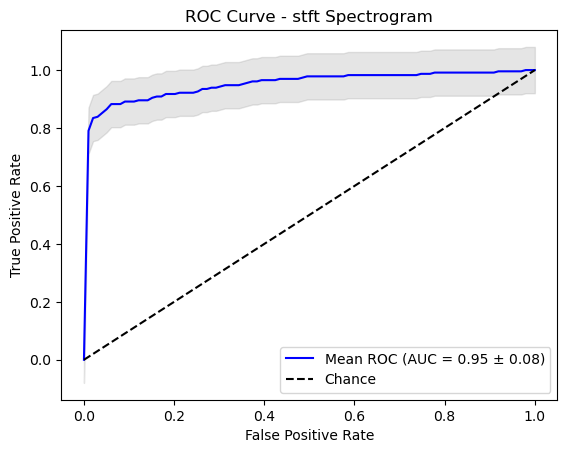

In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score, precision_score, recall_score, cohen_kappa_score
from tensorflow.keras import Input, Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, LeakyReLU, Multiply, Add, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import time

# Define the base path for all data folders
data_dir = r'F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\ReadText\converted_multiclassimg'
spectrogram_folders = ['stft']

# Define the categories (labels)
categories = ['Normal_Cleaned', 'PD Severity 2_Cleaned', 'PD Severity 3_Cleaned', 'PD Severity 4_Cleaned']

# Function to load images and labels from a directory
def load_data_from_directory(base_path, label):
    img_data_list = []
    labels = []
    for img_file in os.listdir(base_path):
        img_path = os.path.join(base_path, img_file)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (128, 128))
            img_data_list.append(img)
            labels.append(label)
    return img_data_list, labels

# Define the PSFAN model function
def PSFAN(input, num_classes):
    conv1 = Conv2D(32, (3, 3), dilation_rate=1, activation=LeakyReLU(alpha=0.02))(input)
    x = Conv2D(32, (1, 1), padding='same')(conv1)
    x = Conv2D(32, (3, 3), padding='same')(x)
    x = Conv2D(32, (1, 1), padding='same')(x)
    a = Activation('sigmoid')(x)
    attention = Multiply()([a, conv1])
    add = Add()([x, attention])
    M = MaxPooling2D(pool_size=(3, 3), padding='valid')(add)
    F = Flatten()(M)

    conv2 = Conv2D(32, (3, 3), dilation_rate=2, activation=LeakyReLU(alpha=0.02))(conv1)
    x = Conv2D(32, (1, 1), padding='same')(conv2)
    x = Conv2D(32, (3, 3), padding='same')(x)
    x = Conv2D(32, (1, 1), padding='same')(x)
    a1 = Activation('sigmoid')(x)
    attention1 = Multiply()([a1, conv2])
    add1 = Add()([x, attention1])
    M1 = MaxPooling2D(pool_size=(3, 3), padding='valid')(add1)
    F1 = Flatten()(M1)

    conv3 = Conv2D(64, (3, 3), dilation_rate=3, activation=LeakyReLU(alpha=0.02))(conv2)
    x = Conv2D(64, (1, 1), padding='same')(conv3)
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = Conv2D(64, (1, 1), padding='same')(x)
    a2 = Activation('sigmoid')(x)
    attention2 = Multiply()([a2, conv3])
    add2 = Add()([x, attention2])
    M2 = MaxPooling2D(pool_size=(3, 3), padding='valid')(add2)
    F2 = Flatten()(M2)

    conv4 = Conv2D(64, (3, 3), dilation_rate=4, activation=LeakyReLU(alpha=0.02))(conv3)
    x = Conv2D(64, (1, 1), padding='same')(conv4)
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = Conv2D(64, (1, 1), padding='same')(x)
    a3 = Activation('sigmoid')(x)
    attention3 = Multiply()([a3, conv4])
    add3 = Add()([x, attention3])
    M3 = MaxPooling2D(pool_size=(3, 3), padding='valid')(add3)
    F3 = Flatten()(M3)

    C = Concatenate()([F, F1, F2, F3])

    D2 = Dense(128, activation=LeakyReLU(alpha=0.02))(C)
    D2 = Dense(64, activation=LeakyReLU(alpha=0.02))(D2)

    OUT = Dense(num_classes, activation='softmax')(D2)
    model = Model(inputs=[input], outputs=OUT, name="PSFANModel")
    return model

# Process each spectrogram folder separately
for spectrogram in spectrogram_folders:
    print(f"Training model for spectrogram type: {spectrogram}")

    # Define the paths for each class
    control_path = os.path.join(data_dir, spectrogram, 'Normal_Cleaned')
    severity_2_path = os.path.join(data_dir, spectrogram, 'PD Severity 2_Cleaned')
    severity_3_path = os.path.join(data_dir, spectrogram, 'PD Severity 3_Cleaned')
    severity_4_path = os.path.join(data_dir, spectrogram, 'PD Severity 4_Cleaned')

    # Load images for each class
    control_images, control_labels = load_data_from_directory(control_path, 0)
    severity_2_images, severity_2_labels = load_data_from_directory(severity_2_path, 1)
    severity_3_images, severity_3_labels = load_data_from_directory(severity_3_path, 2)
    severity_4_images, severity_4_labels = load_data_from_directory(severity_4_path, 3)

    # Combine data
    img_data_list = control_images + severity_2_images + severity_3_images + severity_4_images
    labels = control_labels + severity_2_labels + severity_3_labels + severity_4_labels

    # Preprocess data
    img_data = np.array(img_data_list).astype('float32') / 255.0
    labels = np.array(labels)
    x, y = shuffle(img_data, labels, random_state=42)

    num_classes = 4  # Updated to 4 classes for multi-class classification
    input_shape = (128, 128, 3)
    input_layer = Input(shape=input_shape, name='input')
    model = PSFAN(input_layer, num_classes)

    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    fold_metrics = []
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    for fold, (train_index, test_index) in enumerate(kfold.split(x, y), 1):
        X_train, X_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Convert labels to categorical for multi-class classification
        y_train = to_categorical(y_train, num_classes)
        y_test = to_categorical(y_test, num_classes)

        model.compile(optimizer=Adam(learning_rate=0.0001, decay=0.0006), loss='categorical_crossentropy', metrics=['accuracy'])
        early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

        # Record training time
        start_train = time.time()
        history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=16, verbose=1, callbacks=[early_stop])
        training_time = time.time() - start_train

        # Record testing time
        start_test = time.time()
        y_pred_prob = model.predict(X_test)
        testing_time = time.time() - start_test

        y_pred = np.argmax(y_pred_prob, axis=1)
        y_true = np.argmax(y_test, axis=1)

        # Calculate metrics
        accuracy = np.mean(y_pred == y_true) * 100
        f1 = f1_score(y_true, y_pred, average='macro') * 100
        precision = precision_score(y_true, y_pred, average='macro') * 100
        recall = recall_score(y_true, y_pred, average='macro') * 100
        kappa = cohen_kappa_score(y_true, y_pred) * 100

        fold_metrics.append([fold, accuracy, f1, precision, recall, kappa, training_time, testing_time])

        # ROC Curve
        fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob[:, 1], pos_label=1)
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        auc_score = auc(fpr, tpr)
        aucs.append(auc_score)

    # Calculate mean and std deviation of metrics
    metrics_df = pd.DataFrame(fold_metrics, columns=['Fold', 'Accuracy', 'F1 Score', 'Precision', 'Recall', 'Kappa', 'Training Time', 'Testing Time'])
    metrics_df.set_index('Fold', inplace=True)
    print(metrics_df)

    # Plot the ROC curve
    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = np.mean(aucs)
    std_auc = np.std(aucs)

    plt.figure()
    plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.2f} ± {std_auc:.2f})')
    plt.fill_between(mean_fpr, mean_tpr - std_auc, mean_tpr + std_auc, color='grey', alpha=0.2)
    plt.plot([0, 1], [0, 1], linestyle='--', color='k', label='Chance')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {spectrogram} Spectrogram')
    plt.legend(loc='lower right')
    plt.show()


Epoch 1/10
27/27 [==============================] - 142s 5s/step - loss: 3.3698 - accuracy: 0.5071 - val_loss: 0.9461 - val_accuracy: 0.6667
Epoch 2/10
27/27 [==============================] - 138s 5s/step - loss: 0.6615 - accuracy: 0.6381 - val_loss: 0.5542 - val_accuracy: 0.7381
Epoch 3/10
27/27 [==============================] - 136s 5s/step - loss: 0.4924 - accuracy: 0.7929 - val_loss: 0.6255 - val_accuracy: 0.6571
Epoch 4/10
27/27 [==============================] - 137s 5s/step - loss: 0.4492 - accuracy: 0.7988 - val_loss: 0.5099 - val_accuracy: 0.7905
Epoch 5/10
27/27 [==============================] - 138s 5s/step - loss: 0.3540 - accuracy: 0.8464 - val_loss: 0.4978 - val_accuracy: 0.7857
Epoch 6/10
27/27 [==============================] - 138s 5s/step - loss: 0.3336 - accuracy: 0.8690 - val_loss: 0.5187 - val_accuracy: 0.7810
Epoch 7/10
27/27 [==============================] - 144s 5s/step - loss: 0.2599 - accuracy: 0.9060 - val_loss: 0.5154 - val_accuracy: 0.7762
Epoch 8/10
27

C:\conda_temp\ipykernel_6040\208681292.py:146: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


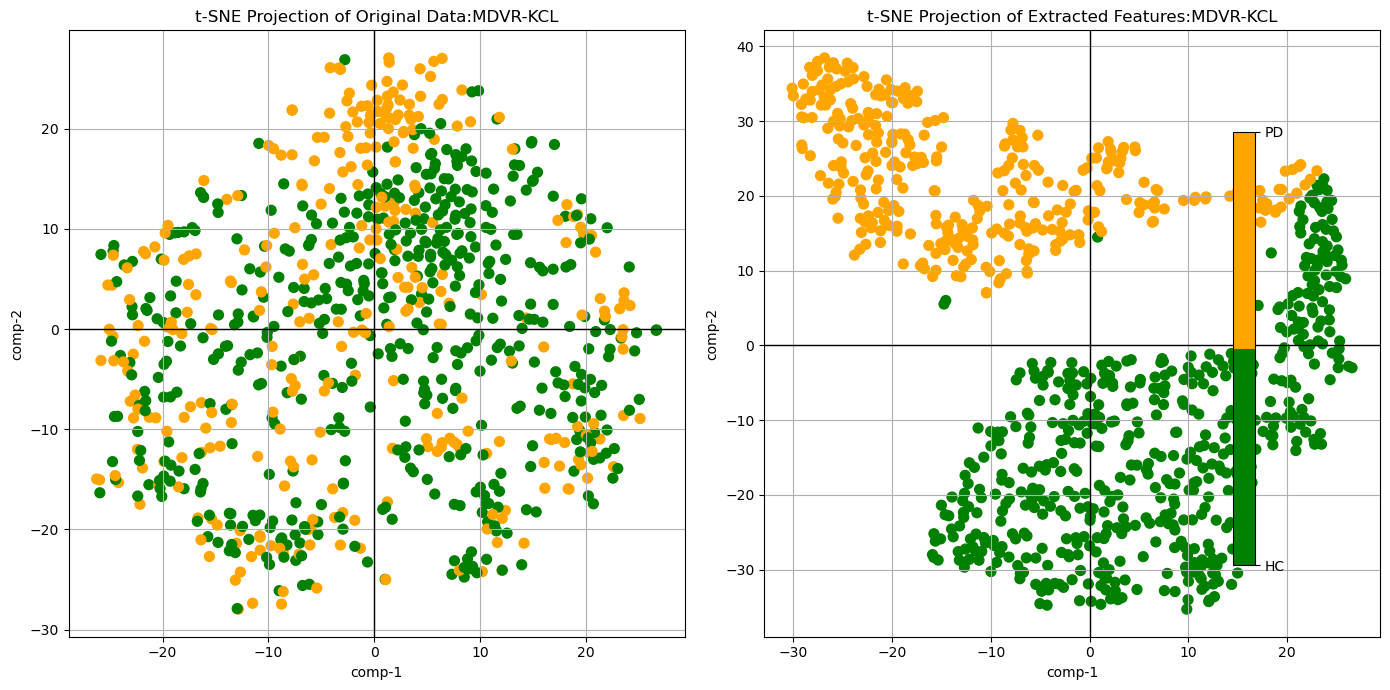

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, LeakyReLU, Multiply, Add, MaxPooling2D, Flatten, Dense, Concatenate, Activation, Input
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from matplotlib.colors import ListedColormap

# Define the PSFAN model function
def PSFAN(input, num_classes):
    conv1 = Conv2D(32, (3, 3), dilation_rate=1, activation=LeakyReLU(alpha=0.02))(input)
    x = Conv2D(32, (1, 1), padding='same')(conv1)
    x = Conv2D(32, (3, 3), padding='same')(x)
    x = Conv2D(32, (1, 1), padding='same')(x)
    a = Activation('sigmoid')(x)
    attention = Multiply()([a, conv1])
    add = Add()([x, attention])
    M = MaxPooling2D(pool_size=(3, 3), padding='valid')(add)
    F = Flatten()(M)

    conv2 = Conv2D(32, (3, 3), dilation_rate=2, activation=LeakyReLU(alpha=0.02))(conv1)
    x = Conv2D(32, (1, 1), padding='same')(conv2)
    x = Conv2D(32, (3, 3), padding='same')(x)
    x = Conv2D(32, (1, 1), padding='same')(x)
    a1 = Activation('sigmoid')(x)
    attention1 = Multiply()([a1, conv2])
    add1 = Add()([x, attention1])
    M1 = MaxPooling2D(pool_size=(3, 3), padding='valid')(add1)
    F1 = Flatten()(M1)

    conv3 = Conv2D(64, (3, 3), dilation_rate=3, activation=LeakyReLU(alpha=0.02))(conv2)
    x = Conv2D(64, (1, 1), padding='same')(conv3)
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = Conv2D(64, (1, 1), padding='same')(x)
    a2 = Activation('sigmoid')(x)
    attention2 = Multiply()([a2, conv3])
    add2 = Add()([x, attention2])
    M2 = MaxPooling2D(pool_size=(3, 3), padding='valid')(add2)
    F2 = Flatten()(M2)

    conv4 = Conv2D(64, (3, 3), dilation_rate=4, activation=LeakyReLU(alpha=0.02))(conv3)
    x = Conv2D(64, (1, 1), padding='same')(conv4)
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = Conv2D(64, (1, 1), padding='same')(x)
    a3 = Activation('sigmoid')(x)
    attention3 = Multiply()([a3, conv4])
    add3 = Add()([x, attention3])
    M3 = MaxPooling2D(pool_size=(3, 3), padding='valid')(add3)
    F3 = Flatten()(M3)

    C = Concatenate()([F, F1, F2, F3])

    D2 = Dense(128, activation=LeakyReLU(alpha=0.02))(C)
    D2 = Dense(64, activation=LeakyReLU(alpha=0.02))(D2)

    OUT = Dense(num_classes, activation='softmax')(D2)
    model = Model(inputs=[input], outputs=OUT, name="PSFANModel")
    return model

# Load and preprocess the data (spectrograms)
def load_spectrogram_images(input_folders):
    images = []
    labels = []
    for label, folder in enumerate(input_folders):
        for filename in os.listdir(folder):
            if filename.endswith('.png'):
                img_path = os.path.join(folder, filename)
                img = load_img(img_path, target_size=(128, 128))  # Resize to the model's input size
                img_array = img_to_array(img) / 255.0  # Normalize pixel values
                images.append(img_array)
                labels.append(label)  # Assign label (0: Normal, 1: PD2, etc.)
    return np.array(images), np.array(labels)

# Define input data paths
input_folders = [
    r'F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\Cleaned_ReadTextCONVERTED\stft\HC',         # Label: 0
    r'F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\Cleaned_ReadTextCONVERTED\stft\PD',  # Label: 1

]

# Load images and corresponding labels
images, labels = load_spectrogram_images(input_folders)

# Split data into training and validation sets
train_data, val_data, train_labels, val_labels = train_test_split(images, labels, test_size=0.2, random_state=42)
train_labels = to_categorical(train_labels, num_classes=4)
val_labels = to_categorical(val_labels, num_classes=4)

# Build and compile the PSFAN model
input_shape = (128, 128, 3)
input_layer = Input(shape=input_shape)
psfan_model = PSFAN(input_layer, num_classes=4)
psfan_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
psfan_model.fit(train_data, train_labels, epochs=10, validation_data=(val_data, val_labels))

# Extract features from the penultimate layer for t-SNE projection
feature_extractor = Model(inputs=psfan_model.input, outputs=psfan_model.layers[-3].output)  # Extract features before the last Dense layer
extracted_features = feature_extractor.predict(train_data)

# Perform t-SNE on both original data and extracted features
original_data = train_data.reshape(train_data.shape[0], -1)  # Flatten the original spectrograms for t-SNE
tsne_original = TSNE(n_components=2, random_state=42)
reduced_original = tsne_original.fit_transform(original_data)

tsne_extracted = TSNE(n_components=2, random_state=42)
reduced_extracted = tsne_extracted.fit_transform(extracted_features)


# Define class names and updated colors for the plot
class_names = ['HC', 'PD']
colors = ['green', 'orange']  # Change colors to 'green' and 'orange'
cmap = ListedColormap(colors)  # Apply updated colors to the colormap

# Plot t-SNE results for comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# First subplot: t-SNE of original data
scatter1 = axes[0].scatter(reduced_original[:, 0], reduced_original[:, 1], c=np.argmax(train_labels, axis=1), cmap=cmap, s=50)
axes[0].set_title('t-SNE Projection of Original Data:MDVR-KCL')
axes[0].set_xlabel('comp-1')
axes[0].set_ylabel('comp-2')
axes[0].grid(True)
axes[0].axhline(0, color='black', linewidth=1)
axes[0].axvline(0, color='black', linewidth=1)

# Second subplot: t-SNE of extracted features
scatter2 = axes[1].scatter(reduced_extracted[:, 0], reduced_extracted[:, 1], c=np.argmax(train_labels, axis=1), cmap=cmap, s=50)
axes[1].set_title('t-SNE Projection of Extracted Features:MDVR-KCL')
axes[1].set_xlabel('comp-1')
axes[1].set_ylabel('comp-2')
axes[1].grid(True)
axes[1].axhline(0, color='black', linewidth=1)
axes[1].axvline(0, color='black', linewidth=1)

# Colorbar legend for class labels
cbar = fig.colorbar(scatter1, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_ticks([0, 1])  # Set ticks for 2 classes
cbar.set_ticklabels(class_names)  # Set tick labels corresponding to the 2 classes

# Adjust layout and show the plot
plt.tight_layout()
plt.show()




Epoch 1/10
27/27 [==============================] - 139s 5s/step - loss: 2.8191 - accuracy: 0.5322 - val_loss: 0.9036 - val_accuracy: 0.6495
Epoch 2/10
27/27 [==============================] - 140s 5s/step - loss: 0.9189 - accuracy: 0.6624 - val_loss: 0.9187 - val_accuracy: 0.6729
Epoch 3/10
27/27 [==============================] - 140s 5s/step - loss: 0.7900 - accuracy: 0.7245 - val_loss: 0.7624 - val_accuracy: 0.7103
Epoch 4/10
27/27 [==============================] - 139s 5s/step - loss: 0.6752 - accuracy: 0.7515 - val_loss: 0.9877 - val_accuracy: 0.6869
Epoch 5/10
27/27 [==============================] - 143s 5s/step - loss: 0.8097 - accuracy: 0.7116 - val_loss: 1.2846 - val_accuracy: 0.6495
Epoch 6/10
27/27 [==============================] - 146s 5s/step - loss: 0.5554 - accuracy: 0.7843 - val_loss: 1.1128 - val_accuracy: 0.5888
Epoch 7/10
27/27 [==============================] - 144s 5s/step - loss: 0.4638 - accuracy: 0.8417 - val_loss: 0.9409 - val_accuracy: 0.6262
Epoch 8/10
27

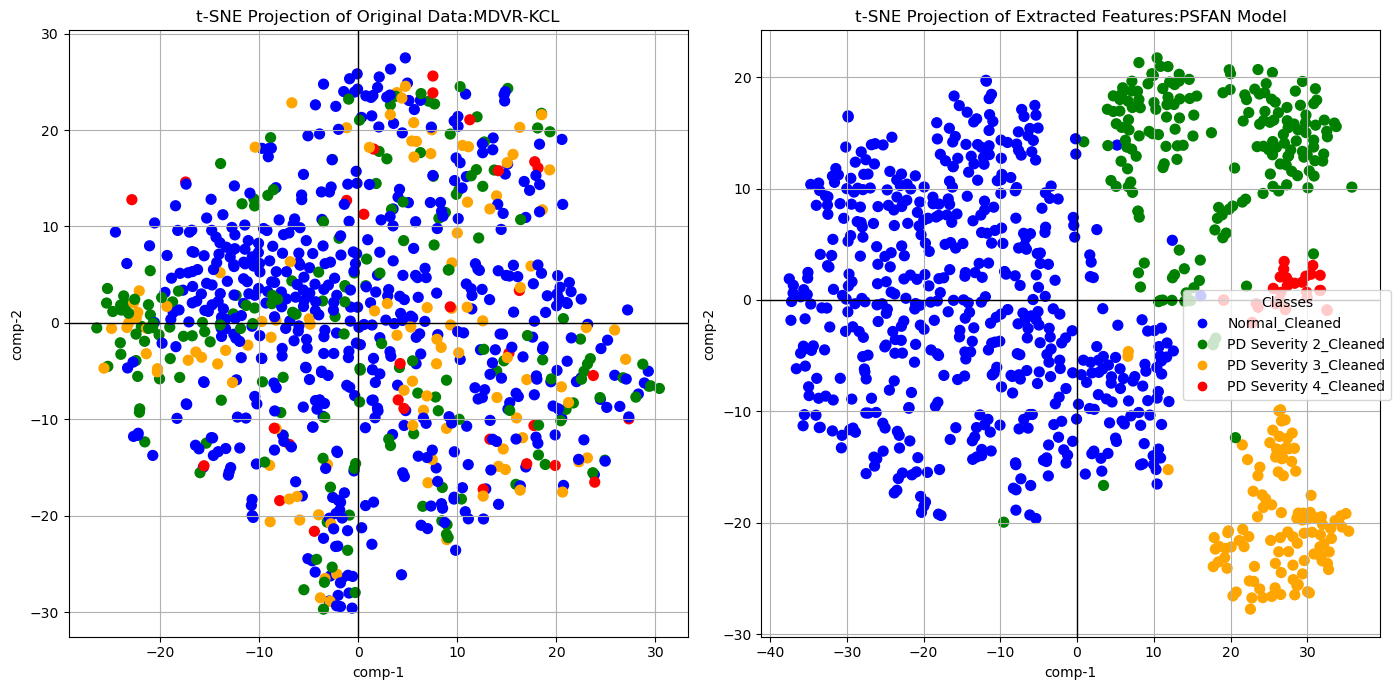

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, LeakyReLU, Multiply, Add, MaxPooling2D, Flatten, Dense, Concatenate, Activation, Input
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from matplotlib.colors import ListedColormap

# Define the PSFAN model function
def PSFAN(input, num_classes):
    conv1 = Conv2D(32, (3, 3), dilation_rate=1, activation=LeakyReLU(alpha=0.02))(input)
    x = Conv2D(32, (1, 1), padding='same')(conv1)
    x = Conv2D(32, (3, 3), padding='same')(x)
    x = Conv2D(32, (1, 1), padding='same')(x)
    a = Activation('sigmoid')(x)
    attention = Multiply()([a, conv1])
    add = Add()([x, attention])
    M = MaxPooling2D(pool_size=(3, 3), padding='valid')(add)
    F = Flatten()(M)

    conv2 = Conv2D(32, (3, 3), dilation_rate=2, activation=LeakyReLU(alpha=0.02))(conv1)
    x = Conv2D(32, (1, 1), padding='same')(conv2)
    x = Conv2D(32, (3, 3), padding='same')(x)
    x = Conv2D(32, (1, 1), padding='same')(x)
    a1 = Activation('sigmoid')(x)
    attention1 = Multiply()([a1, conv2])
    add1 = Add()([x, attention1])
    M1 = MaxPooling2D(pool_size=(3, 3), padding='valid')(add1)
    F1 = Flatten()(M1)

    conv3 = Conv2D(64, (3, 3), dilation_rate=3, activation=LeakyReLU(alpha=0.02))(conv2)
    x = Conv2D(64, (1, 1), padding='same')(conv3)
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = Conv2D(64, (1, 1), padding='same')(x)
    a2 = Activation('sigmoid')(x)
    attention2 = Multiply()([a2, conv3])
    add2 = Add()([x, attention2])
    M2 = MaxPooling2D(pool_size=(3, 3), padding='valid')(add2)
    F2 = Flatten()(M2)

    conv4 = Conv2D(64, (3, 3), dilation_rate=4, activation=LeakyReLU(alpha=0.02))(conv3)
    x = Conv2D(64, (1, 1), padding='same')(conv4)
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = Conv2D(64, (1, 1), padding='same')(x)
    a3 = Activation('sigmoid')(x)
    attention3 = Multiply()([a3, conv4])
    add3 = Add()([x, attention3])
    M3 = MaxPooling2D(pool_size=(3, 3), padding='valid')(add3)
    F3 = Flatten()(M3)

    C = Concatenate()([F, F1, F2, F3])

    D2 = Dense(128, activation=LeakyReLU(alpha=0.02))(C)
    D2 = Dense(64, activation=LeakyReLU(alpha=0.02))(D2)

    OUT = Dense(num_classes, activation='softmax')(D2)
    model = Model(inputs=[input], outputs=OUT, name="PSFANModel")
    return model

# Load and preprocess the data (spectrograms)
def load_spectrogram_images(input_folders):
    images = []
    labels = []
    for label, folder in enumerate(input_folders):
        for filename in os.listdir(folder):
            if filename.endswith('.png'):
                img_path = os.path.join(folder, filename)
                img = load_img(img_path, target_size=(128, 128))  # Resize to the model's input size
                img_array = img_to_array(img) / 255.0  # Normalize pixel values
                images.append(img_array)
                labels.append(label)  # Assign label (0: Normal, 1: PD Severity 2, 2: PD Severity 3, 3: PD Severity 4)
    return np.array(images), np.array(labels)

# Define input data paths
input_folders = [
    r'F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\ReadText\converted_multiclassimg\stft\Normal_Cleaned',         # Label: 0 (Normal)
    r'F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\ReadText\converted_multiclassimg\stft\PD Severity 2_Cleaned',  # Label: 1 (PD Severity 2)
    r'F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\ReadText\converted_multiclassimg\stft\PD Severity 3_Cleaned',  # Label: 2 (PD Severity 3)
    r'F:\PhD 2021-2024\Phd-IV Year\VIII\Voice MDVR\DATASET V\ReadText\converted_multiclassimg\stft\PD Severity 4_Cleaned',  # Label: 3 (PD Severity 4)
]

# Load images and corresponding labels
images, labels = load_spectrogram_images(input_folders)

# Split data into training and validation sets
train_data, val_data, train_labels, val_labels = train_test_split(images, labels, test_size=0.2, random_state=42)
train_labels = to_categorical(train_labels, num_classes=4)
val_labels = to_categorical(val_labels, num_classes=4)

# Build and compile the PSFAN model
input_shape = (128, 128, 3)
input_layer = Input(shape=input_shape)
psfan_model = PSFAN(input_layer, num_classes=4)
psfan_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
psfan_model.fit(train_data, train_labels, epochs=10, validation_data=(val_data, val_labels))

# Extract features from the penultimate layer for t-SNE projection
feature_extractor = Model(inputs=psfan_model.input, outputs=psfan_model.layers[-3].output)  # Extract features before the last Dense layer
extracted_features = feature_extractor.predict(train_data)

# Perform t-SNE on both original data and extracted features
original_data = train_data.reshape(train_data.shape[0], -1)  # Flatten the original spectrograms for t-SNE
tsne_original = TSNE(n_components=2, random_state=42)
reduced_original = tsne_original.fit_transform(original_data)

tsne_extracted = TSNE(n_components=2, random_state=42)
reduced_extracted = tsne_extracted.fit_transform(extracted_features)

# Define class names and colors for the plot
class_names = ['Normal_Cleaned', 'PD Severity 2_Cleaned', 'PD Severity 3_Cleaned', 'PD Severity 4_Cleaned']
colors = ['blue', 'green', 'orange', 'red']  # Four distinct colors for each class
cmap = ListedColormap(colors)

# Plot t-SNE results for comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# First subplot: t-SNE of original data
scatter1 = axes[0].scatter(reduced_original[:, 0], reduced_original[:, 1], c=np.argmax(train_labels, axis=1), cmap=cmap, s=50)
axes[0].set_title('t-SNE Projection of Original Data:MDVR-KCL')
axes[0].set_xlabel('comp-1')
axes[0].set_ylabel('comp-2')
axes[0].grid(True)
axes[0].axhline(0, color='black', linewidth=1)
axes[0].axvline(0, color='black', linewidth=1)

# Second subplot: t-SNE of extracted features
scatter2 = axes[1].scatter(reduced_extracted[:, 0], reduced_extracted[:, 1], c=np.argmax(train_labels, axis=1), cmap=cmap, s=50)
axes[1].set_title('t-SNE Projection of Extracted Features:PSFAN Model')
axes[1].set_xlabel('comp-1')
axes[1].set_ylabel('comp-2')
axes[1].grid(True)
axes[1].axhline(0, color='black', linewidth=1)
axes[1].axvline(0, color='black', linewidth=1)

# Add legend
handles, labels = scatter1.legend_elements()
fig.legend(handles, class_names, loc='center right', title="Classes")

plt.tight_layout()
plt.show()
